In [11]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [54]:
workfolder="C:/Users/mslil_000/Desktop/Homework/Applied Data Science/subways"

subway_edges=pd.read_csv( workfolder+"/sub_edges.csv" , header=0 )
subway_edges_TS_scenario=pd.read_csv( workfolder+"/sub_edges_TS_scenario.csv" , header=0 )
subway_xy=pd.read_csv(workfolder+"/sub_longlat.csv", header=0)

In [24]:
subway_edges.head()

,A,B
0,101,103
1,103,101
2,103,104
3,104,103
4,104,106


In [42]:
subway_xy.head()

,A,Long,Lat
0,101,-73.898583,40.889248
1,103,-73.900878,40.884653
2,104,-73.904834,40.878856
3,106,-73.909831,40.874561
4,107,-73.915279,40.869444


In [26]:
subway_network=nx.DiGraph()
for i in subway_edges.index:
    subway_network.add_edge(subway_edges.A[i],subway_edges.B[i])
    
MLC=sorted(nx.strongly_connected_components(subway_network), key=len, reverse=True)
subway_networkC=subway_network.subgraph(MLC[0])

In [55]:
subway_network_TS=nx.DiGraph()
for i in subway_edges_TS_scenario.index:
    subway_network_TS.add_edge(subway_edges_TS_scenario.A[i],subway_edges_TS_scenario.B[i])
    
MLC=sorted(nx.strongly_connected_components(subway_network_TS), key=len, reverse=True)
subway_network_TSC=subway_network_TS.subgraph(MLC[0])

In [44]:
IntPos={}
for c in subway_xy.index:
    IntPos[subway_xy.A[c]]=(subway_xy.Long[c],subway_xy.Lat[c])
    c += 1

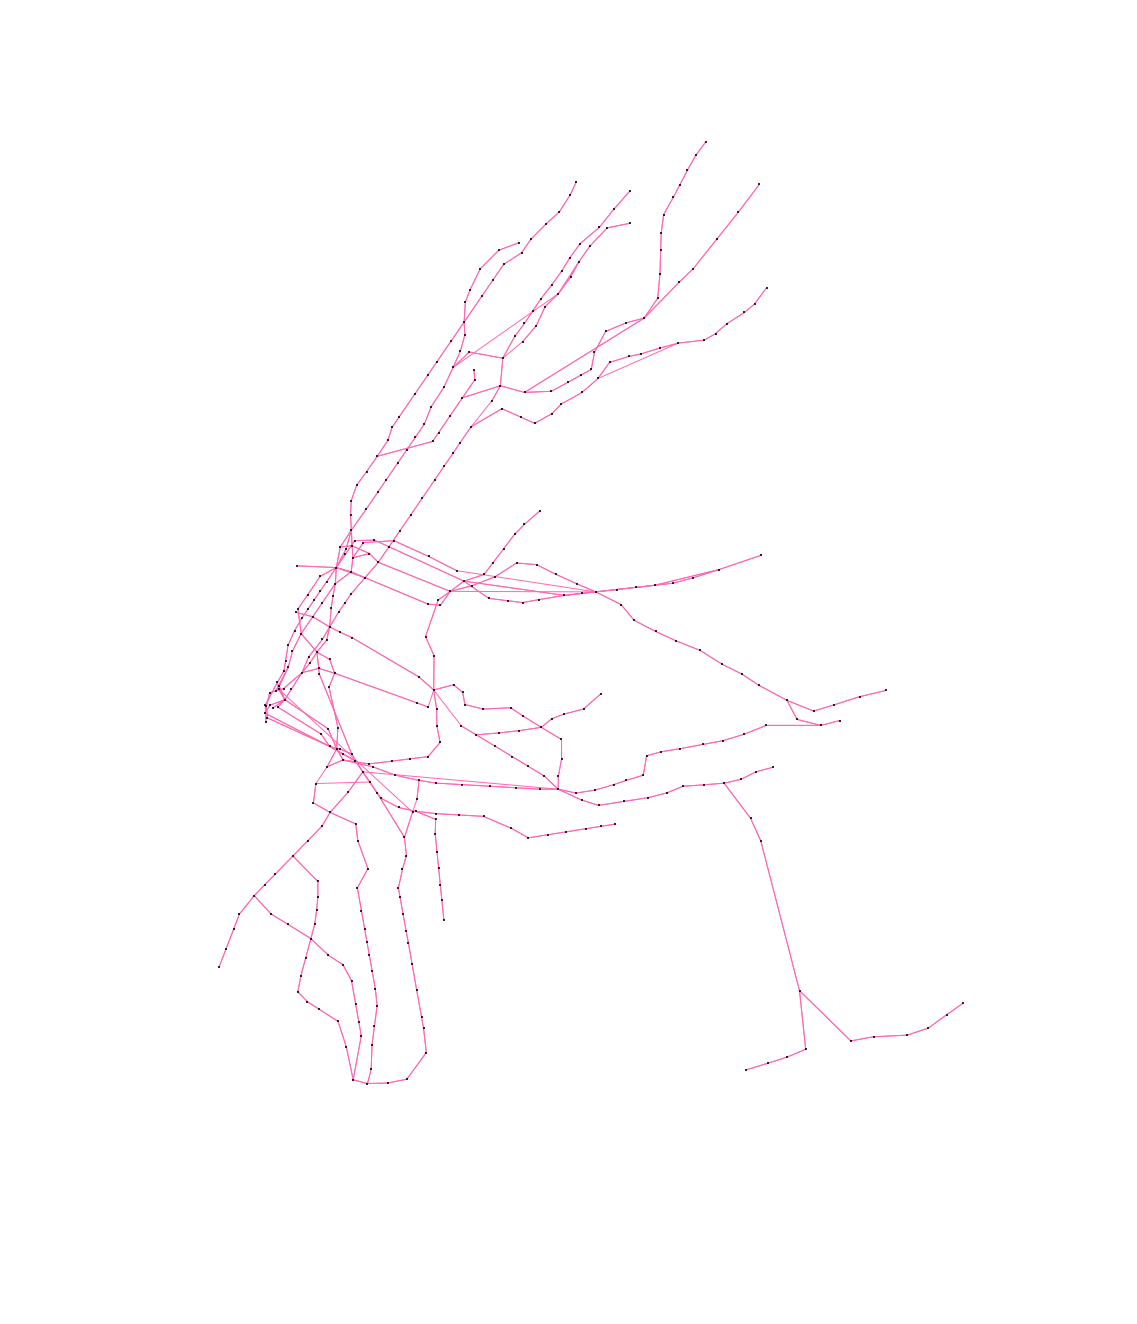

In [69]:
#visualize the street newtork
plt.figure(figsize = (15,18))
nx.draw(subway_networkC,IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='hotpink')

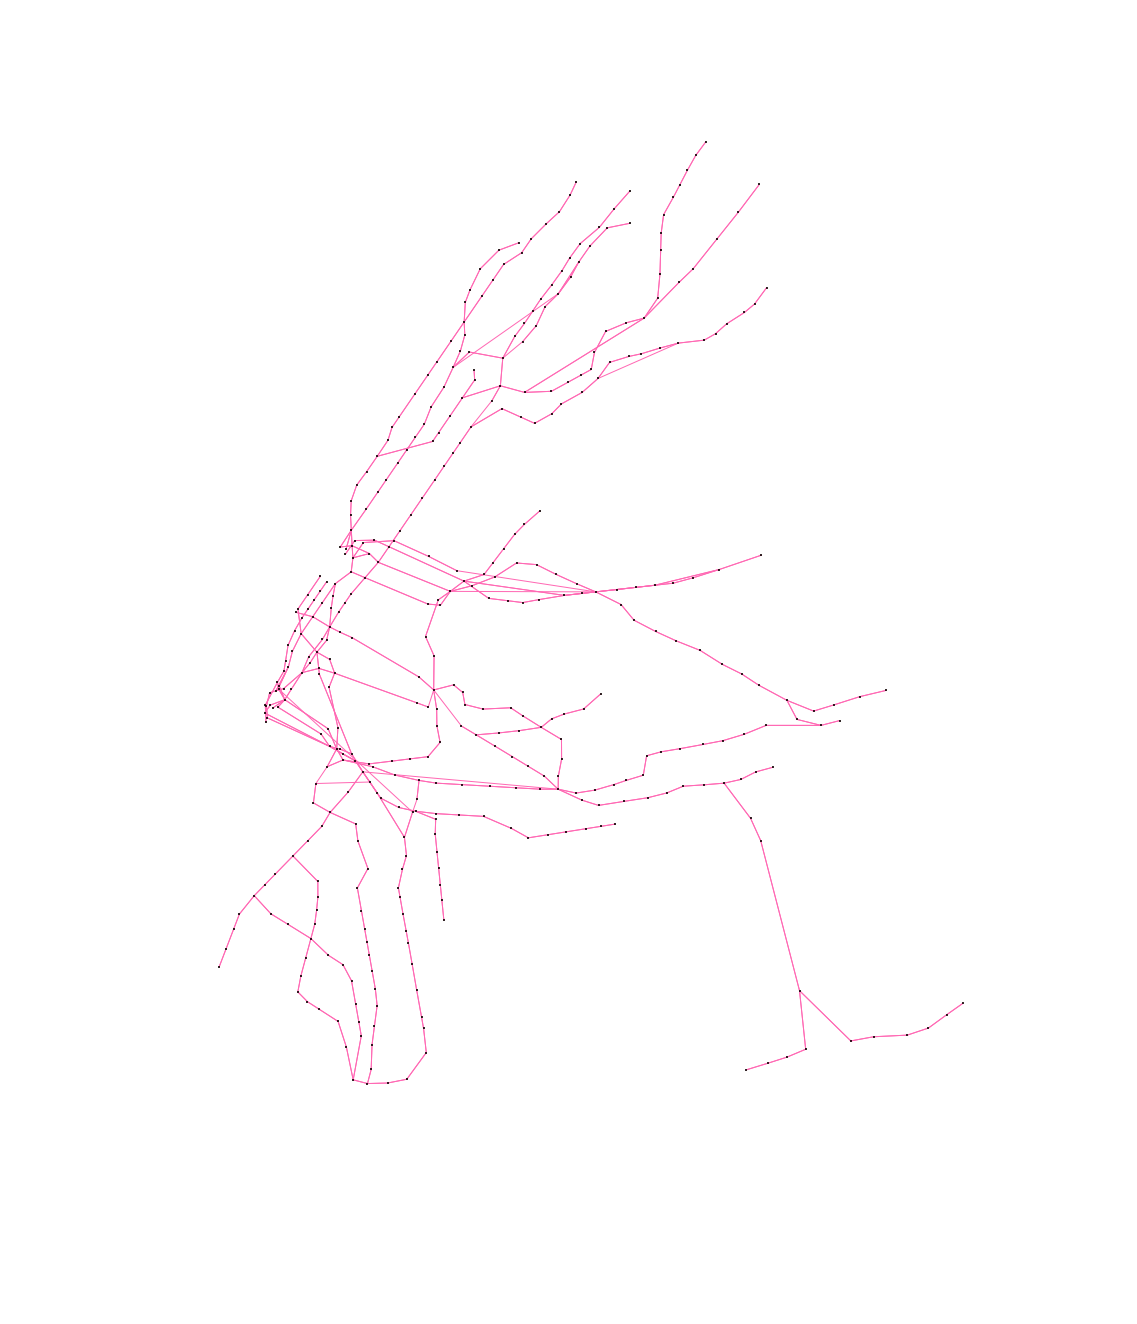

In [56]:
#visualize the street newtork
plt.figure(figsize = (15,18))
nx.draw(subway_network_TSC,IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='hotpink')

In [47]:
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

In [48]:
a= nx.degree(subway_networkC)
topdict(a,5)

1|127-725-902-R16-A27:18
2|229-418-M22-A38:14
3|635-L03-R20:12
4|232-420-R28:12
5|A51-J27-L22:11


In [58]:
a= nx.degree(subway_network_TSC)
topdict(a,5)

1|229-418-M22-A38:14
2|635-L03-R20:12
3|232-420-R28:12
4|719-F09-G22:11
5|A51-J27-L22:11


In [49]:
b= nx.eigenvector_centrality(subway_networkC)
topdict(b,5)

1|127-725-902-R16-A27:0.516258881587
2|724-D16:0.346624763901
3|631-723-901:0.32244401789
4|D17-R17:0.269997070534
5|A25:0.245735056189


In [60]:
b= nx.eigenvector_centrality(subway_network_TSC)
topdict(b,5)

NetworkXError: eigenvector_centrality():
power iteration failed to converge in %d iterations."%(i+1))

In [51]:
d = nx.closeness_centrality(subway_networkC)
topdict(d,5)

1|127-725-902-R16-A27:0.0743303175448
2|A51-J27-L22:0.0741986895697
3|D19-L02:0.0740021193924
4|D18:0.073793589292
5|D17-R17:0.0737156931738


In [61]:
d = nx.closeness_centrality(subway_network_TSC)
topdict(d,5)

1|A51-J27-L22:0.0725848563969
2|D19-L02:0.0719089498189
3|724-D16:0.0715265866209
4|D18:0.0715020576132
5|635-L03-R20:0.0713064295486


In [52]:
c5 = nx.pagerank(subway_networkC,0.95)
topdict(c5,5)

1|127-725-902-R16-A27:0.00749864562018
2|229-418-M22-A38:0.0071738263022
3|235-D24-R31:0.00684301265421
4|710-G14:0.0066083599951
5|232-420-R28:0.00637234176645


In [62]:
c5 = nx.pagerank(subway_network_TSC,0.95)
topdict(c5,5)

1|229-418-M22-A38:0.00726545355141
2|235-D24-R31:0.00689328342864
3|710-G14:0.00671207540013
4|232-420-R28:0.0064286872414
5|G29-L10:0.00585373529525


In [53]:
c5 = nx.pagerank(subway_networkC,0.20)
topdict(c5,5)

1|127-725-902-R16-A27:0.00367780700895
2|229-418-M22-A38:0.00350283208947
3|G29-L10:0.00324642857143
4|232-420-R28:0.00316647252876
5|635-L03-R20:0.00315145125661


In [67]:
c5 = nx.pagerank(subway_network_TSC,0.20)
topdict(c5,5)

1|229-418-M22-A38:0.00351959205162
2|G29-L10:0.00326196172249
3|232-420-R28:0.00318162311503
4|635-L03-R20:0.00316718188464
5|710-G14:0.00313417131845


In [79]:
path_mets_city_hall=nx.shortest_path(subway_network, '702', 'R24')
print path_mets_city_hall

['702', '707', '712', '718-R09', '629-R11', '630-F11', '631-723-901', '632', '633', '634', '635-L03-R20', 'R21', 'R22', '639-M20-Q01-R23', 'R24']


In [84]:
def visualize_path(path):
    plt.figure(figsize = (15,15))
    nx.draw(subway_networkC,pos=IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='pink')
    x=[IntPos[v][0] for v in path]
    y=[IntPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

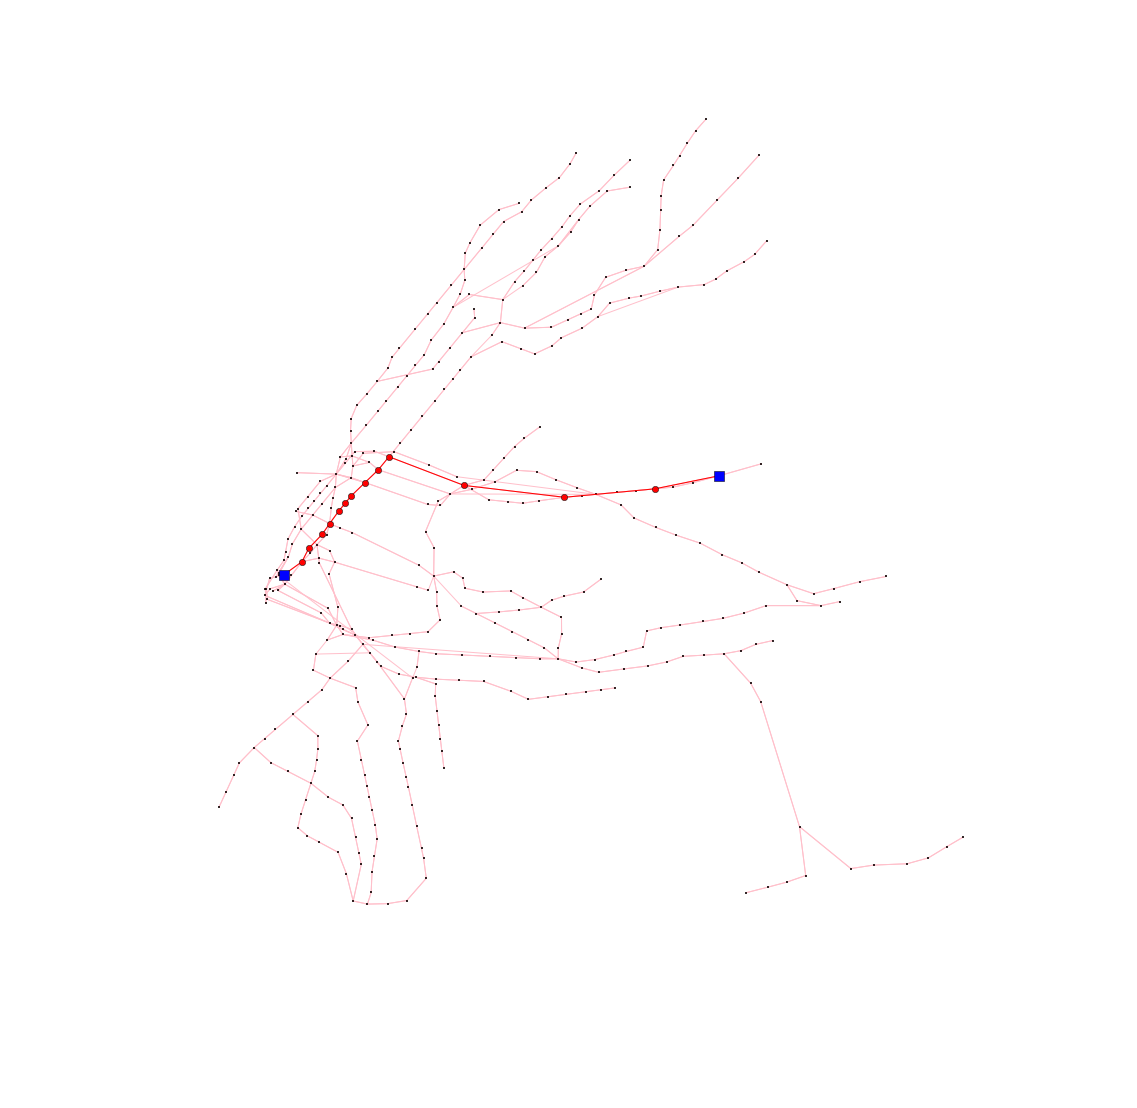

In [85]:
visualize_path(path_mets_city_hall)

In [94]:
path_yankees_city_hall=nx.shortest_path(subway_network, '414-D11', 'R24')
print path_yankees_city_hall

['414-D11', '222-415', '224', '225', '226', '227', '120', '121', '122', '123', '124', '125-A24', 'A25', '127-725-902-R16-A27', 'A28', 'A30', 'A31', 'A32-D20', '637-D21', '638', '639-M20-Q01-R23', 'R24']


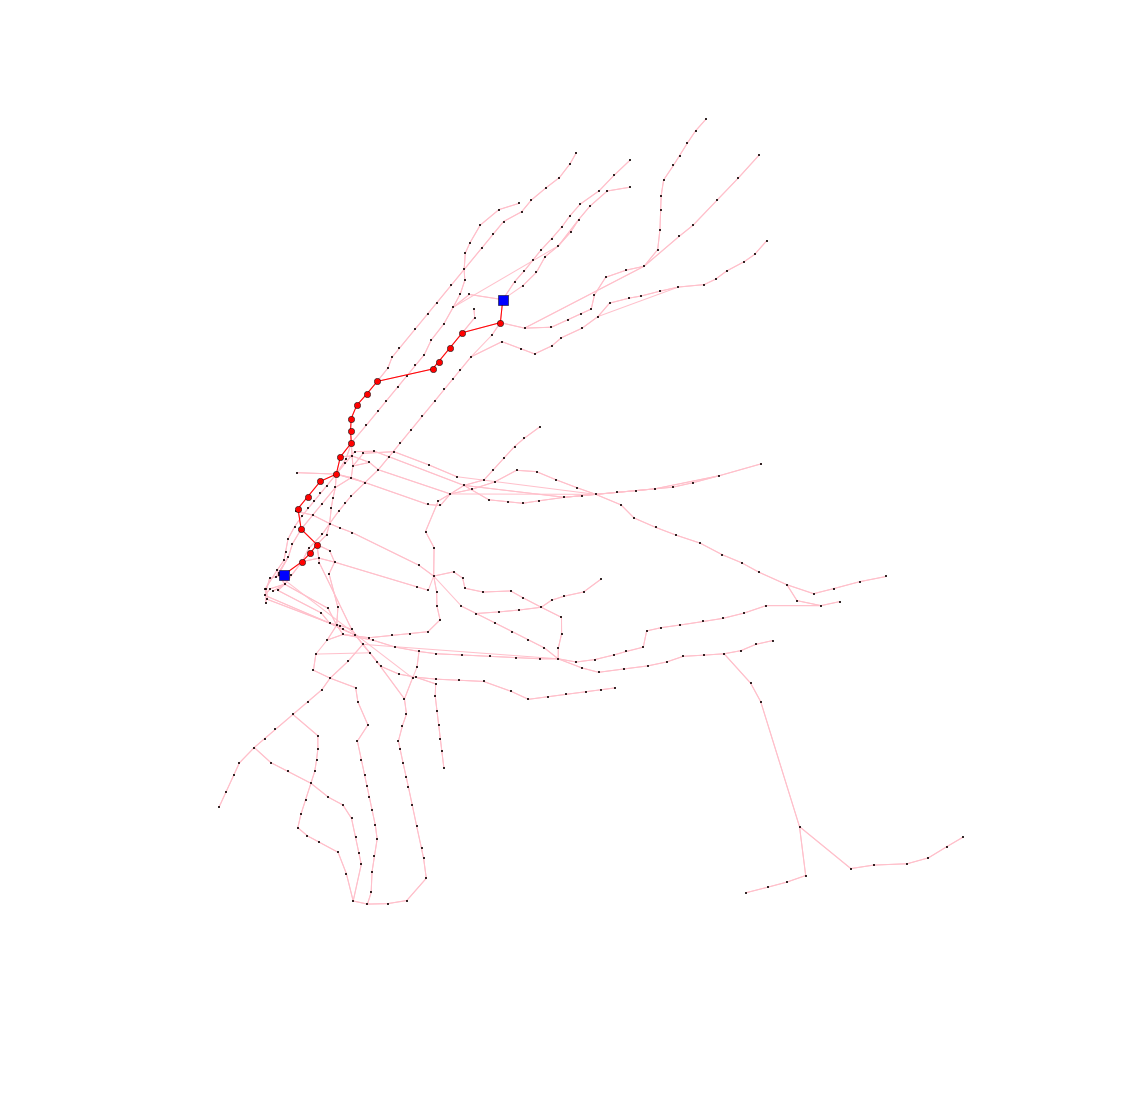

In [87]:
visualize_path(path_yankees_city_hall)

In [93]:
path_yankees_city_hall_TS=nx.shortest_path(subway_network_TS, '414-D11', 'R24')
print len(path_yankees_city_hall_TS)

22


In [90]:
def visualize_path(path):
    plt.figure(figsize = (15,15))
    nx.draw(subway_network_TSC,pos=IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='pink')
    x=[IntPos[v][0] for v in path]
    y=[IntPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

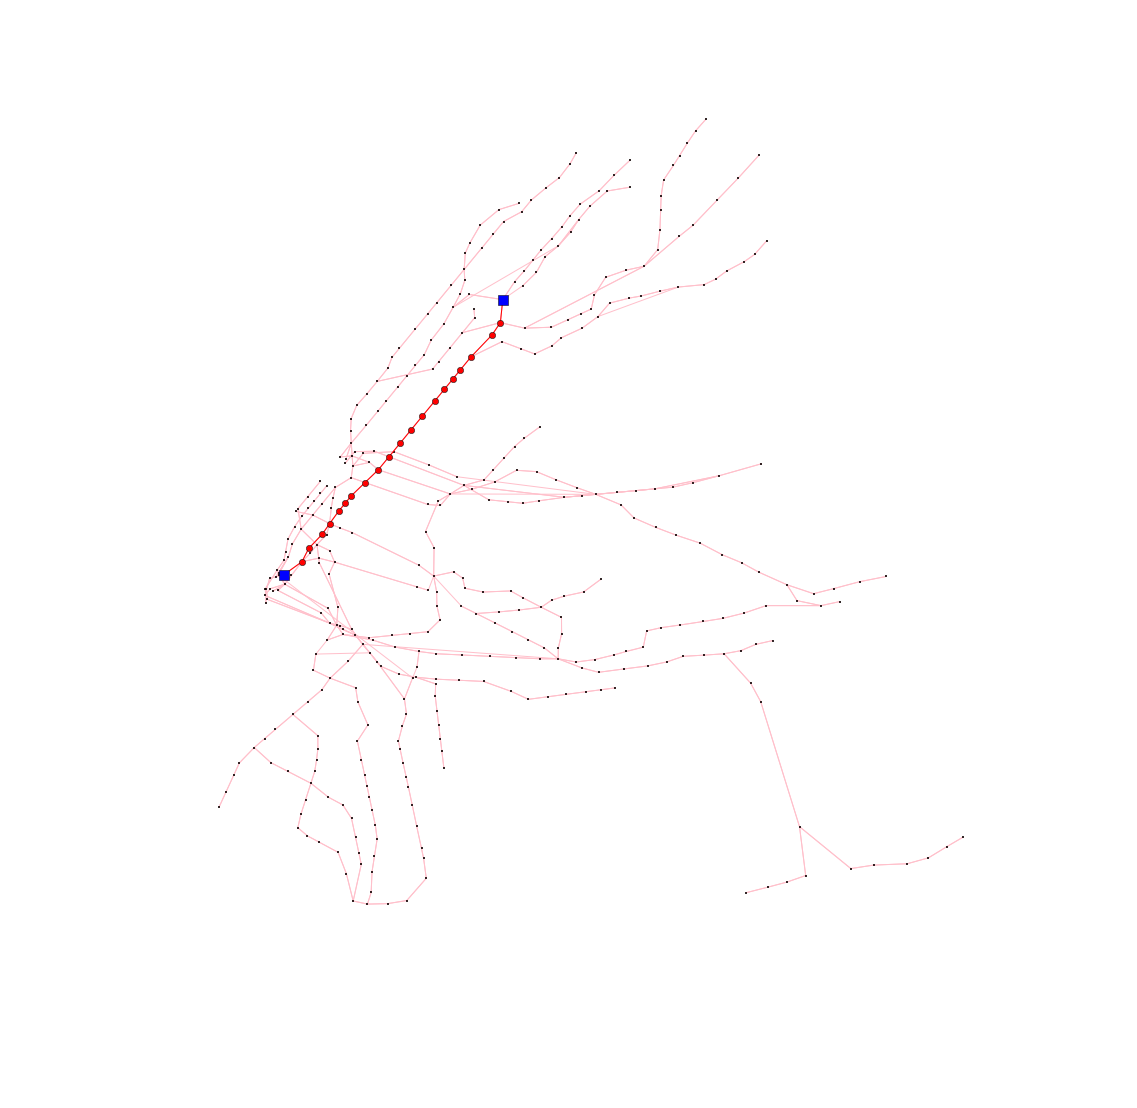

In [91]:
visualize_path(path_yankees_city_hall_TS)